In [22]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import numpy as np
import json
import os
import tensorflow as tf

fileName1 = './data/CMU_exp_shrink_output_zero.xls'
df_ora1 = pd.read_excel(fileName1)

np.set_printoptions(threshold=np.inf)

#fileName2 = './data/CMU_oral_output.xls'
#df_ora2 = pd.read_excel(fileName2)

#df_ora = pd.merge(df_ora1,df_ora2,on = 'key')
df_ora = df_ora1

#object_user = 's002'
#object_user = 's032'
object_user = 's036'
#object_user = 's047'
#object_user = 's052'

df_ora.loc[df_ora['user']!=object_user,'user'] = 'imposter'
df = df_ora
#df = df_ora.loc[(df_ora['user']==object_user) | (df_ora['session']<400)]

#print (df) 
###################################PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['user'])
df.drop(['user'], axis=1, inplace=True)

X = df.drop(['target','session','key'], axis=1)
y = df['target'].values

将样本分为训练集和测试集

In [23]:
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=19, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
'''
'''
#s002
index_train1 = [i for i in range(200)]    #s002
index_train2 = [i+400 for i in range(50)] #s032
index_train3 = [i+800 for i in range(50)] #s036
index_train4 = [i+1200 for i in range(50)] #s047
index_train5 = [i+1600 for i in range(50)] #s052

index_test1 = [i+200 for i in range(200)] #s002
index_test2 = [i+450 for i in range(350)]  #s032
index_test3 = [i+850 for i in range(350)]  #s036
index_test4 = [i+1250 for i in range(350)]  #s047
index_test5 = [i+1650 for i in range(350)]  #s052
'''
'''
index_train1 = [i+400 for i in range(200)] #s032
index_train2 = [i for i in range(50)] #s002
index_train3 = [i+800 for i in range(50)] #s036
index_train4 = [i+1200 for i in range(50)] #s047
index_train5 = [i+1600 for i in range(50)] #s052

index_test1 = [i+600 for i in range(200)] #s032
index_test2 = [i+50 for i in range(350)]  #s002
index_test3 = [i+850 for i in range(350)]  #s036
index_test4 = [i+1250 for i in range(350)]  #s047
index_test5 = [i+1650 for i in range(350)]  #s052
'''


#s036
index_train1 = [i+800 for i in range(200)] #s036
index_train2 = [i for i in range(50)] #s002
index_train3 = [i+400 for i in range(50)] #s032
index_train4 = [i+1200 for i in range(50)] #s047
index_train5 = [i+1600 for i in range(50)] #s052

index_test1 = [i+1000 for i in range(200)] #s036
index_test2 = [i+50 for i in range(350)]  #s002
index_test3 = [i+450 for i in range(350)]  #s032
index_test4 = [i+1250 for i in range(350)]  #s047
index_test5 = [i+1650 for i in range(350)]  #s052

'''
#s047
index_train1 = [i+300 for i in range(200)] #s047
index_train2 = [i for i in range(50)] #s002
index_train3 = [i+100 for i in range(50)] #s032
index_train4 = [i+200 for i in range(50)] #s036
index_train5 = [i+700 for i in range(50)] #s052

index_test1 = [i+500 for i in range(200)] #s047
index_test2 = [i+50 for i in range(50)]  #s002
index_test3 = [i+150 for i in range(50)]  #s032
index_test4 = [i+250 for i in range(50)]  #s036
index_test5 = [i+750 for i in range(50)]  #s052
'''
'''
#s052
index_train1 = [i+400 for i in range(200)] #s052
index_train2 = [i for i in range(50)] #s002
index_train3 = [i+100 for i in range(50)] #s032
index_train4 = [i+200 for i in range(50)] #s036
index_train5 = [i+300 for i in range(50)] #s047

index_test1 = [i+600 for i in range(200)] #s052
index_test2 = [i+50 for i in range(50)]  #s002
index_test3 = [i+150 for i in range(50)]  #s032
index_test4 = [i+250 for i in range(50)]  #s036
index_test5 = [i+350 for i in range(50)]  #s047
'''

index_train = index_train1 + index_train2 + index_train3 + index_train4 + index_train5
index_test = index_test1 + index_test2 + index_test3 + index_test4 + index_test5

X_train = X.iloc[index_train]
y_train = y[index_train]

Optimal number of features : 14


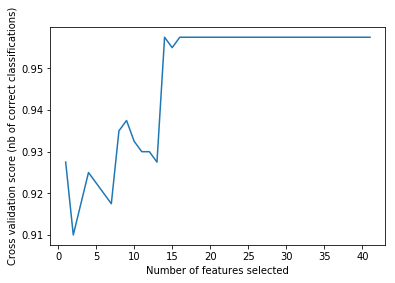

In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear", C=1)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(4), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [26]:
rfecv_sport = rfecv.support_.tolist()
rfecv_sport
select_cul = [i for i in range(len(rfecv_sport)) if rfecv_sport[i] == True]
select_cul

[4, 6, 9, 10, 13, 16, 21, 22, 24, 25, 29, 30, 31, 32]

[4, 6, 9, 10, 13, 16, 21, 22, 24, 25, 29, 30, 31, 32]

In [95]:
#rfecv_sport = rfecv.support_.tolist()
#rfecv_sport

In [27]:
rfecv_sport = rfecv.support_.tolist()
select_cul = [i for i in range(len(rfecv_sport)) if rfecv_sport[i] == True]


X = X.iloc[:,select_cul]
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X)

X_train = X.iloc[index_train]
X_test = X.iloc[index_test]
y_train = y[index_train]
y_test = y[index_test]

SVM2

In [28]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# 最优超参数组合列表
params = [
        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
        {'kernel': ['poly'], 'C': [1,10,100], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 100,1000], 'gamma':[1, 0.1, 0.01, 0.001]}
        ]

model = ms.GridSearchCV(svm.SVC(probability=True), 
                        params, 
                        refit=True,
                        return_train_score=True,        # 后续版本需要指定True才有score方法  
                        cv=4)
model.fit(X_train, y_train)

# GridSearchCV的属性
print('Attrabutes:vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv')
print('cv_results_:',model.cv_results_.keys())
print('Desc:',model.cv_results_['params'][2], model.cv_results_['mean_train_score'][2], 
      model.cv_results_['mean_test_score'][2],model.cv_results_['rank_test_score'][2])
print('best_estimator_:',model.best_estimator_) 
print('best_params_:',model.best_params_) 
print('best_params_:', model.cv_results_['params'][model.best_index_])
print('best_score_:',model.best_score_)
print('scorer_:',model.scorer_)
print('n_splits_:',model.n_splits_)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Attrabutes:vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
cv_results_: dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'param_degree', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'mean_train_score', 'std_train_score'])
Desc: {'C': 100, 'kernel': 'linear'} 0.9924999999999999 0.905 28
best_estimator_: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best_score_: 0.9925
scorer_: <function _passthrough_scorer at 0x7fd148a0b950>
n_splits_: 4


In [32]:
y_predict_SVM = model.best_estimator_.predict(X_test)
ann_fileName = "feature_SVM_best"+object_user+"_Hawkes.txt"
np.savetxt(ann_fileName, np.array(y_predict_SVM))

In [30]:
#评价指标
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,accuracy_score

y_true = np.reshape(y_test, [-1])
y_pred = np.reshape(y_predict_SVM, [-1])
  
# 评价指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='binary')
f1score = f1_score(y_true, y_pred, average='binary')
  
# Micro F1: 将n分类的评价拆成n个二分类的评价，将n个二分类评价的TP、FP、RN对应相加，计算评价准确率和召回率，由这2个准确率和召回率计算的F1 score即为Micro F1。
# Macro F1: 将n分类的评价拆成n个二分类的评价，计算每个二分类的F1 score，n个F1 score的平均值即为Macro F1。
# 一般来讲，Macro F1、Micro F1高的分类效果好。Macro F1受样本数量少的类别影响大。
micro_f1 = f1_score(y_true, y_pred,average='micro')
macro_f1 = f1_score(y_true, y_pred,average='macro')
  
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1score:',f1score)
print('Macro-F1: {}'.format(macro_f1))
print('Micro-F1: {}'.format(micro_f1))

accuracy: 0.9975
precision: 1.0
recall: 0.98
f1score: 0.98989898989899
Macro-F1: 0.9942362281877261
Micro-F1: 0.9975


accuracy: 0.98
precision: 0.868421052631579
recall: 0.99
f1score: 0.9252336448598131
Macro-F1: 0.9568448166579007
Micro-F1: 0.98

神经网络

In [33]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt

mlp_clf__tuned_parameters = {"hidden_layer_sizes": [(8),(16),(16,8),(32),(32,16),(40),(40,16),(50,),(50,32),(64), (64,32),(128,64,32)],
                             "solver": ['adam', 'sgd', 'lbfgs'],
                             "max_iter": [20,100,200,1000,5000],
                             "verbose": [True]
                             }
mlp = MLPClassifier()
estimator = GridSearchCV(mlp, mlp_clf__tuned_parameters, n_jobs=6)
estimator.fit(X_train, y_train)

print(estimator.get_params().keys()) 
print (estimator.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 0.67065015
Iteration 2, loss = 0.61397143
Iteration 3, loss = 0.56823099
Iteration 4, loss = 0.52606864
Iteration 5, loss = 0.48785619
Iteration 6, loss = 0.45148558
Iteration 7, loss = 0.41715582
Iteration 8, loss = 0.38391094
Iteration 9, loss = 0.35090293
Iteration 10, loss = 0.31843993
Iteration 11, loss = 0.28623266
Iteration 12, loss = 0.25491176
Iteration 13, loss = 0.22471643
Iteration 14, loss = 0.19602507
Iteration 15, loss = 0.16982327
Iteration 16, loss = 0.14577059
Iteration 17, loss = 0.12483516
Iteration 18, loss = 0.10646022
Iteration 19, loss = 0.09096729
Iteration 20, loss = 0.07818156
Iteration 21, loss = 0.06760230
Iteration 22, loss = 0.05854697
Iteration 23, loss = 0.05121836
Iteration 24, loss = 0.04544838
Iteration 25, loss = 0.03994700
Iteration 26, loss = 0.03628246
Iteration 27, loss = 0.03242984
Iteration 28, loss = 0.02973846
Iteration 29, loss = 0.02712880
Iteration 30, loss = 0.02534665
Iteration 31, loss = 0.02320149
Iteration 32, los

In [34]:
y_predict = estimator.best_estimator_.predict(X_test)
#y_predict
#ann_fileName = "feature_ANN_best"+object_user+"_Hawkes.txt"
#np.savetxt(ann_fileName, np.array(y_predict))

In [35]:
#评价指标
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,accuracy_score

y_true = np.reshape(y_test, [-1])
y_pred = np.reshape(y_predict, [-1])
  
# 评价指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='binary')
f1score = f1_score(y_true, y_pred, average='binary')
  
# Micro F1: 将n分类的评价拆成n个二分类的评价，将n个二分类评价的TP、FP、RN对应相加，计算评价准确率和召回率，由这2个准确率和召回率计算的F1 score即为Micro F1。
# Macro F1: 将n分类的评价拆成n个二分类的评价，计算每个二分类的F1 score，n个F1 score的平均值即为Macro F1。
# 一般来讲，Macro F1、Micro F1高的分类效果好。Macro F1受样本数量少的类别影响大。
micro_f1 = f1_score(y_true, y_pred,average='micro')
macro_f1 = f1_score(y_true, y_pred,average='macro')
  
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1score:',f1score)
print('Macro-F1: {}'.format(macro_f1))
print('Micro-F1: {}'.format(micro_f1))

accuracy: 0.994375
precision: 0.9948186528497409
recall: 0.96
f1score: 0.9770992366412213
Macro-F1: 0.9869464833010169
Micro-F1: 0.994375


In [36]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

# two-layer neural network 
# train part
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from joblib import dump

#neural network classifier of structure (3,2)
kf = KFold(n_splits=4) # 3-fold cross-validation
best_clf = None
best_score = 0
train_scores = []
test_scores = []
print("kfold-------")
for train_index, test_index in kf.split(X):
    # create neural network using MLPClassifer  {sgd,lbfgs, adam}
    clf = MLPClassifier(solver = 'adam', max_iter = 5000, hidden_layer_sizes = (128, 64, 32),random_state = 1)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    train_scores.append(train_score)
 
    test_score = clf.score(X_test, y_test)
    test_scores.append(test_score)

    #compare score of the tree models and get the best one
    if test_score > best_score:
        best_score = test_score
        best_clf = clf
    
    #print(clf.n_outputs_)
in_sample_error = [1 - score for score in train_scores]
test_set_error = [1 - score for score in test_scores]
print("in_sample_error: ")
print(in_sample_error)
print("test_set_error: ")
print(test_set_error)

#store the classifier
if best_clf != None:
    dump(best_clf, "train_model.m")
    
from joblib import load
clf = load("train_model.m")
y_pred = clf.predict(X_test)
np.savetxt("label_pred.txt", np.array(y_pred)) #save predict result
#print(y_pred)
test_score = clf.score(X_test, y_test)
test_error = 1 - test_score
print('test_score：%s' % test_score)
print('test_error：%s' % test_error)

kfold-------
in_sample_error: 
[0.0, 0.0, 0.0, 0.0]
test_set_error: 
[0.005624999999999991, 0.005624999999999991, 0.005624999999999991, 0.005624999999999991]
test_score：0.994375
test_error：0.005624999999999991


In [39]:
ann_fileName = "feature_ANN_"+object_user+"_Hawkes.txt"
np.savetxt(ann_fileName, np.array(y_pred))

In [38]:
#评价指标
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,accuracy_score

y_true = np.reshape(y_test, [-1])
y_pred = np.reshape(y_pred, [-1])
  
# 评价指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='binary')
f1score = f1_score(y_true, y_pred, average='binary')
  
# Micro F1: 将n分类的评价拆成n个二分类的评价，将n个二分类评价的TP、FP、RN对应相加，计算评价准确率和召回率，由这2个准确率和召回率计算的F1 score即为Micro F1。
# Macro F1: 将n分类的评价拆成n个二分类的评价，计算每个二分类的F1 score，n个F1 score的平均值即为Macro F1。
# 一般来讲，Macro F1、Micro F1高的分类效果好。Macro F1受样本数量少的类别影响大。
micro_f1 = f1_score(y_true, y_pred,average='micro')
macro_f1 = f1_score(y_true, y_pred,average='macro')
  
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1score:',f1score)
print('Macro-F1: {}'.format(macro_f1))
print('Micro-F1: {}'.format(micro_f1))

accuracy: 0.994375
precision: 0.9948186528497409
recall: 0.96
f1score: 0.9770992366412213
Macro-F1: 0.9869464833010169
Micro-F1: 0.994375
